Data set from
https://www.kaggle.com/competitions/spaceship-titanic/overview

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
train_data = pd.read_csv("train.csv")

In [39]:
test_data = pd.read_csv("test.csv")

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [41]:
X = train_data.drop(["PassengerId","Transported","Name"],axis = 1)
y = train_data["Transported"]

In [42]:
X_test2 = test_data.drop(["PassengerId","Name"],axis = 1)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
dtypes: float64(6), object(5)
memory usage: 747.2+ KB


In [45]:
len(y)

8693

In [46]:
X["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [47]:
X["HomePlanet"] = X["HomePlanet"].fillna("Earth")

In [48]:
X_test2["HomePlanet"] = X_test2["HomePlanet"].fillna("Earth")

In [49]:
X["CryoSleep"].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [50]:
X["CryoSleep"] = X["CryoSleep"].fillna(False)

In [51]:
X_test2["CryoSleep"] = X_test2["CryoSleep"].fillna(False)

In [52]:
X["Cabin"] = X["Cabin"].fillna("F/0")

In [53]:
X_test2["Cabin"] = X_test2["Cabin"].fillna("F/0")

In [54]:
new_cabin = []
cabins = X["Cabin"].values
for i in cabins:
    list_i = str(i).split("/")
    new_cabin.append(list_i[0])


In [55]:
new_cabin2 = []
cabins2 = X_test2["Cabin"].values
for i in cabins2:
    list_i = str(i).split("/")
    new_cabin2.append(list_i[0])
X_test2.drop(["Cabin"],axis = 1,inplace = True )
X_test2["Cabin"] = new_cabin2

In [56]:
X.drop(["Cabin"],axis = 1,inplace = True )

In [57]:
X["Cabin"] = new_cabin

In [58]:
X["Destination"].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [59]:
X["Destination"] = X["Destination"].fillna("TRAPPIST-1e")

In [60]:
X_test2["Destination"] = X_test2["Destination"].fillna("TRAPPIST-1e")

In [61]:
X["Age"] = X["Age"].fillna(X["Age"].mean(skipna = True))

In [62]:
X_test2["Age"] = X_test2["Age"].fillna(X_test2["Age"].mean(skipna = True))

In [63]:
X["VIP"].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [64]:
X["VIP"] = X["VIP"].fillna(False)

In [65]:
X_test2["VIP"] = X_test2["VIP"].fillna(False)

In [66]:
X["RoomService"].mean(skipna=True)

224.687617481203

In [67]:
X.values

array([['Europa', False, 'TRAPPIST-1e', ..., 0.0, 0.0, 'B'],
       ['Earth', False, 'TRAPPIST-1e', ..., 549.0, 44.0, 'F'],
       ['Europa', False, 'TRAPPIST-1e', ..., 6715.0, 49.0, 'A'],
       ...,
       ['Earth', False, 'TRAPPIST-1e', ..., 1.0, 0.0, 'G'],
       ['Europa', False, '55 Cancri e', ..., 353.0, 3235.0, 'E'],
       ['Europa', False, 'TRAPPIST-1e', ..., 0.0, 12.0, 'E']],
      dtype=object)

In [68]:
X.values

array([['Europa', False, 'TRAPPIST-1e', ..., 0.0, 0.0, 'B'],
       ['Earth', False, 'TRAPPIST-1e', ..., 549.0, 44.0, 'F'],
       ['Europa', False, 'TRAPPIST-1e', ..., 6715.0, 49.0, 'A'],
       ...,
       ['Earth', False, 'TRAPPIST-1e', ..., 1.0, 0.0, 'G'],
       ['Europa', False, '55 Cancri e', ..., 353.0, 3235.0, 'E'],
       ['Europa', False, 'TRAPPIST-1e', ..., 0.0, 12.0, 'E']],
      dtype=object)

In [33]:
# yeni
lux_list = []

for i in X.values:
    average = 0
    for x in i[5:10]:
        average += x
    if average <= 3500:
        lux_list.append(1)
    else:
        lux_list.append(0)

X.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1,inplace = True)
    
X["Lux"] = lux_list

In [69]:
X_test2.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F


In [35]:
# yeni
lux_list2 = []
for i in X_test2.values:
    average = 0
    for x in i[5:10]:
        average += x
    if average <= 3500:
        lux_list2.append(1)
    else:
        lux_list2.append(0)
X_test2.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis = 1,inplace = True)
X_test2["Lux"] = lux_list2

    

In [70]:
X["RoomService"] = X["RoomService"].fillna(X["RoomService"].mean(skipna=True))

In [71]:
X_test2["RoomService"] = X_test2["RoomService"].fillna(X_test2["RoomService"].mean(skipna=True))

In [72]:
X["FoodCourt"].mean()

458.07720329024676

In [73]:
X["FoodCourt"] = X["FoodCourt"].fillna(X["FoodCourt"].mean(skipna=True))

In [74]:
X_test2["FoodCourt"] = X_test2["FoodCourt"].fillna(X_test2["FoodCourt"].mean(skipna=True))

In [75]:
X["ShoppingMall"].mean(skipna = True)

173.72916912197996

In [76]:
X["ShoppingMall"] = X["ShoppingMall"].fillna(X["ShoppingMall"].mean(skipna = True))

In [77]:
X_test2["ShoppingMall"] = X_test2["ShoppingMall"].fillna(X_test2["ShoppingMall"].mean(skipna=True))

In [78]:
X["Spa"].mean()

311.1387779083431

In [79]:
X["Spa"] = X["Spa"].fillna(X["Spa"].mean(skipna = True))

In [80]:
X_test2["Spa"] = X_test2["Spa"].fillna(X_test2["Spa"].mean(skipna=True))

In [81]:
X["VRDeck"].mean()

304.8547912992357

In [82]:
X["VRDeck"] = X["VRDeck"].fillna(X["VRDeck"].mean(skipna = True))

In [83]:
X_test2["VRDeck"] = X_test2["VRDeck"].fillna(X_test2["VRDeck"].mean(skipna=True))

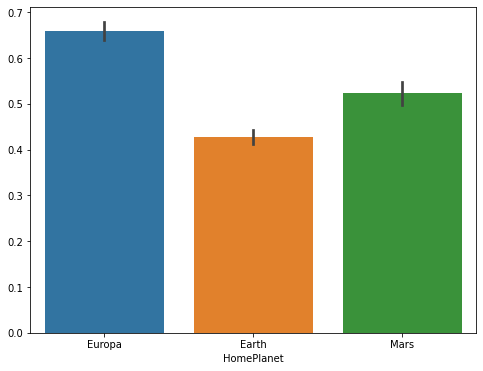

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(y = y,x =X["HomePlanet"])
plt.show()

In [85]:
X["HomePlanet"] = X["HomePlanet"].map({"Europa" : 1.5,"Earth" : 1,"Mars" : 1.25 })

In [86]:
X_test2["HomePlanet"] = X_test2["HomePlanet"].map({"Europa" : 1.5,"Earth" : 1,"Mars" : 1.25 })

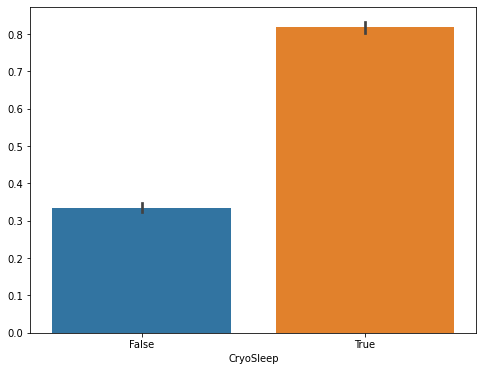

In [87]:
plt.figure(figsize=(8,6))
sns.barplot(y = y,x =X["CryoSleep"])
plt.show()

In [88]:
X["CryoSleep"] = X["CryoSleep"].map({False : 0,True : 1})

In [89]:
X_test2["CryoSleep"] = X_test2["CryoSleep"].map({False : 0,True : 1})

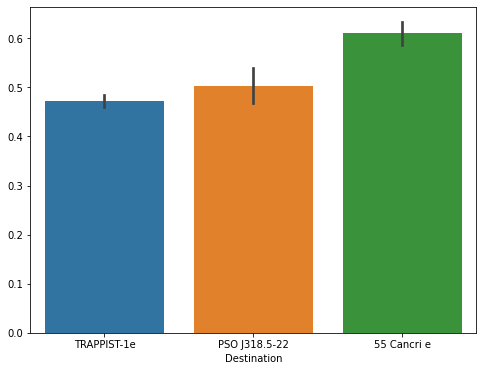

In [90]:
plt.figure(figsize=(8,6))
sns.barplot(y = y,x =X["Destination"])
plt.show()

In [91]:
X = pd.get_dummies(X,columns=["Destination"])

In [92]:
X_test2 = pd.get_dummies(X_test2,columns=["Destination"])

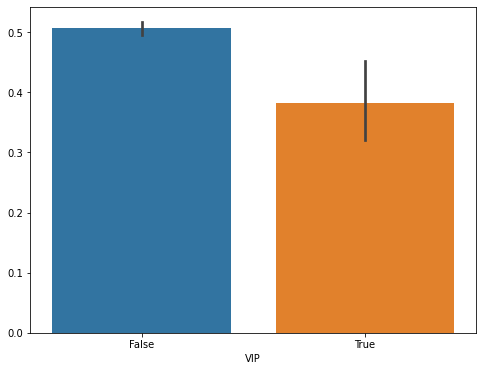

In [93]:
plt.figure(figsize=(8,6))
sns.barplot(y = y,x =X["VIP"])
plt.show()

In [94]:
# X = pd.get_dummies(X,columns=["VIP"])

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X["VIP"] = le.fit_transform(X["VIP"])

In [96]:
# X_test2 = pd.get_dummies(X_test2,columns=["VIP"])

In [97]:
X_test2["VIP"] = le.fit_transform(X_test2["VIP"])

In [98]:
 X.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.5,0,39.0,0,0.0,0.0,0.0,0.0,0.0,B,0,0,1
1,1.0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,F,0,0,1
2,1.5,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,A,0,0,1
3,1.5,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,A,0,0,1
4,1.0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,F,0,0,1


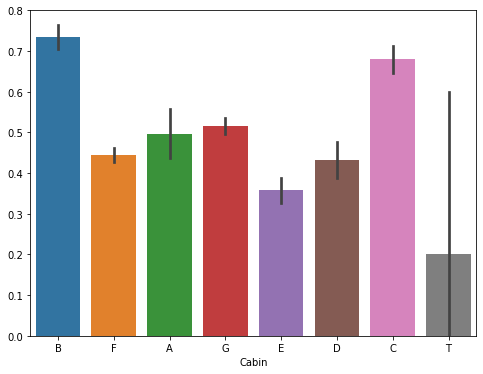

In [99]:
plt.figure(figsize=(8,6))
sns.barplot(y = y,x =X["Cabin"])
plt.show()

In [100]:
X = pd.get_dummies(X,columns=["Cabin"])

In [101]:
X_test2 = pd.get_dummies(X_test2,columns=["Cabin"])

In [102]:
colm = X.columns

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test2 = sc.transform(X_test2)
X_test2 = pd.DataFrame(X_test2,columns = [colm])
X_train = pd.DataFrame(X_train,columns = [colm])
X_test = pd.DataFrame(X_test,columns = [colm])

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver="liblinear",random_state=58)
lr.fit(X_train,y_train)
predict_lr = lr.predict(X_test)
print("Logistic Regression Accuracy Score = % "+str(accuracy_score(y_test,predict_lr)*100))

Logistic Regression Accuracy Score = % 78.68098159509202


In [106]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=345,max_depth=6,learning_rate=0.013, random_state=58)

xgb.fit(X_train,y_train)
predict_xgb = xgb.predict(X_test)
print("Xgboost Accuracy Score = % "+str(accuracy_score(y_test,predict_xgb)*100))

Xgboost Accuracy Score = % 80.329754601227


In [107]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=50,batch_size = 16,validation_data=(X_test,y_test))

Epoch 1/50
381/381 [==============================] - 3s 5ms/step - loss: 0.5289 - accuracy: 0.7270 - val_loss: 0.4371 - val_accuracy: 0.7853
Epoch 2/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4643 - accuracy: 0.7709 - val_loss: 0.4303 - val_accuracy: 0.7949
Epoch 3/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.7827 - val_loss: 0.4327 - val_accuracy: 0.7918
Epoch 4/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.7896 - val_loss: 0.4298 - val_accuracy: 0.7929
Epoch 5/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.7901 - val_loss: 0.4306 - val_accuracy: 0.7941
Epoch 6/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4314 - accuracy: 0.7929 - val_loss: 0.4241 - val_accuracy: 0.7975
Epoch 7/50
381/381 [==============================] - 1s 3ms/step - loss: 0.4265 - accuracy: 0.7949 - val_loss: 0.4228 - val_accuracy: 0.7975
Epoch 

In [108]:
prediction_keras = model.predict(X_test2)
subm_pred  = []

134/134 [==============================] - 0s 2ms/step


In [109]:
subm_pred = []

In [111]:
for i in prediction_keras:
    if i >= 0.5:
        subm_pred.append(True)
    else:
        subm_pred.append(False)
        

In [112]:
ids = test_data["PassengerId"].values
df = pd.DataFrame({"PassengerId" : ids,"Tran" : subm_pred})
df.to_csv("submission.csv",index=False)

**I got 80 percent accuracy with my model's prediction in the kaggle contest.**